In [1]:
import numpy as np

def load_federated_emnist(train_path="Assignment3-data/train_data.npy", test_path="Assignment3-data/test_data.npy"):
    train_data = np.load(train_path, allow_pickle=True)
    test_data = np.load(test_path, allow_pickle=True)

    clients = {}
    for cid in range(len(train_data)):
        x = np.array(train_data[cid]["images"])   # convert list → ndarray
        y = np.array(train_data[cid]["labels"])
        clients[cid] = {"x": x, "y": y}

    test_data = {
        "x": np.array(test_data[0]["images"]),
        "y": np.array(test_data[0]["labels"])
    }
    return clients, test_data, train_data

clients, test_data, train_data = load_federated_emnist()

print(len(clients))                 # should be ~100 (100 users)
print(clients[0]["x"].shape)        # e.g. (N0, 28, 28)
print(clients[0]["y"].shape)        # (N0,)
print(test_data["x"].shape)         # all test images

100
(344, 28, 28)
(344,)
(3621, 28, 28)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def compute_label_hist(clients):
    all_labels = np.concatenate([c["y"] for c in clients.values()])
    global_counts = np.bincount(all_labels, minlength=62)
    return global_counts

def compute_client_hists(clients, selected_users):
    hists = {}
    for uid in selected_users:
        y = clients[uid]["y"]
        hists[uid] = np.bincount(y, minlength=62)
    return hists

global_counts = compute_label_hist(clients)

selected_users = list(clients.keys())[:5]  # pick any 5
client_hists = compute_client_hists(clients, selected_users)

Text(0.5, 1.0, 'Global class distribution')

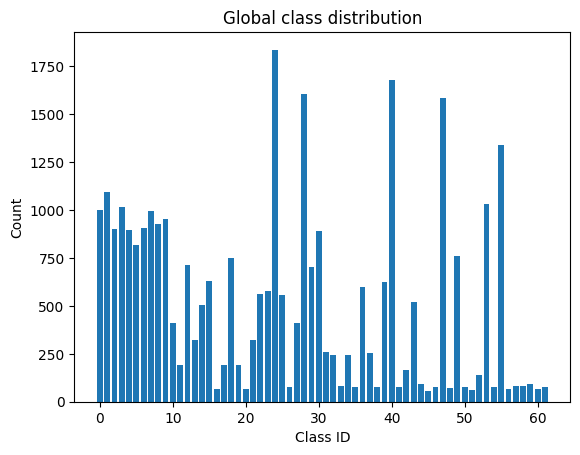

In [4]:
plt.figure()
plt.bar(np.arange(62), global_counts)
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.title("Global class distribution")

In [5]:
selected_users = [0, 3, 7, 12, 45]  # example

client_hists = {}
for uid in selected_users:
    labels = clients[uid]["y"]
    client_hists[uid] = np.bincount(labels, minlength=62)

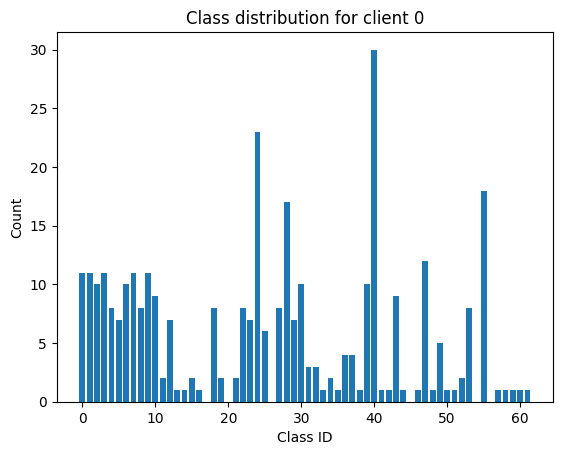

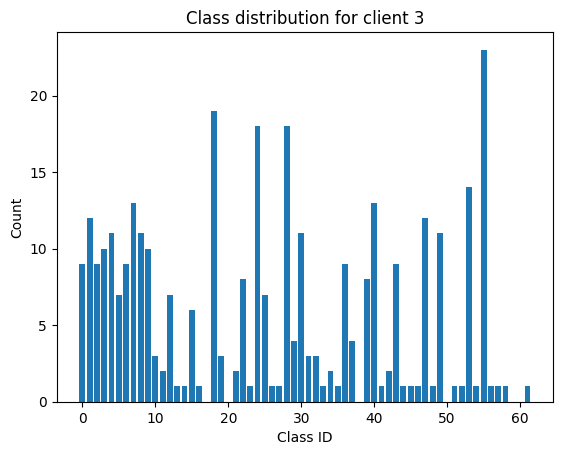

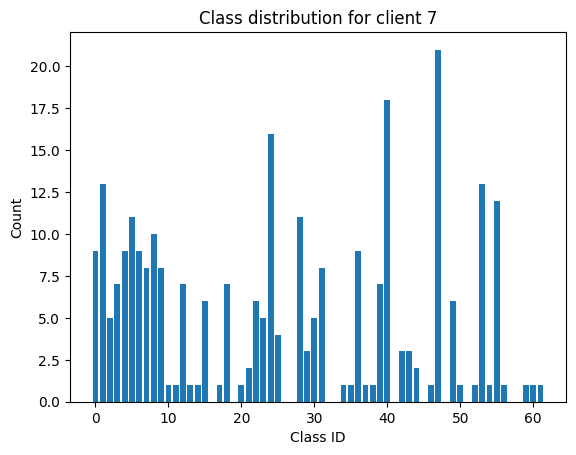

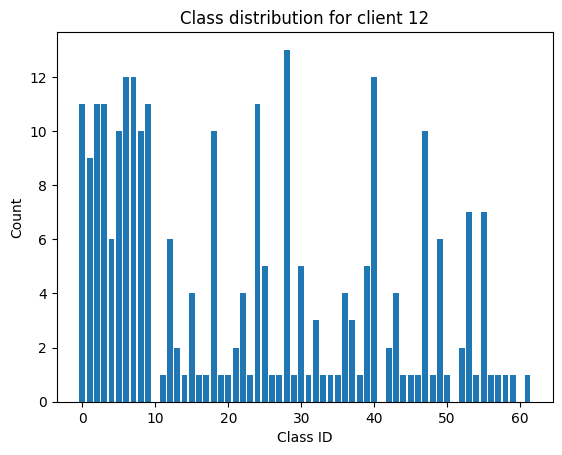

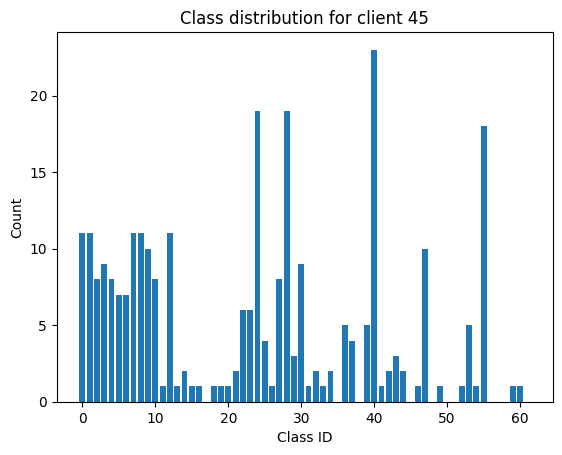

In [6]:
for uid, hist in client_hists.items():
    plt.figure()
    plt.bar(np.arange(62), hist)
    plt.xlabel("Class ID")
    plt.ylabel("Count")
    plt.title(f"Class distribution for client {uid}")
    plt.show()

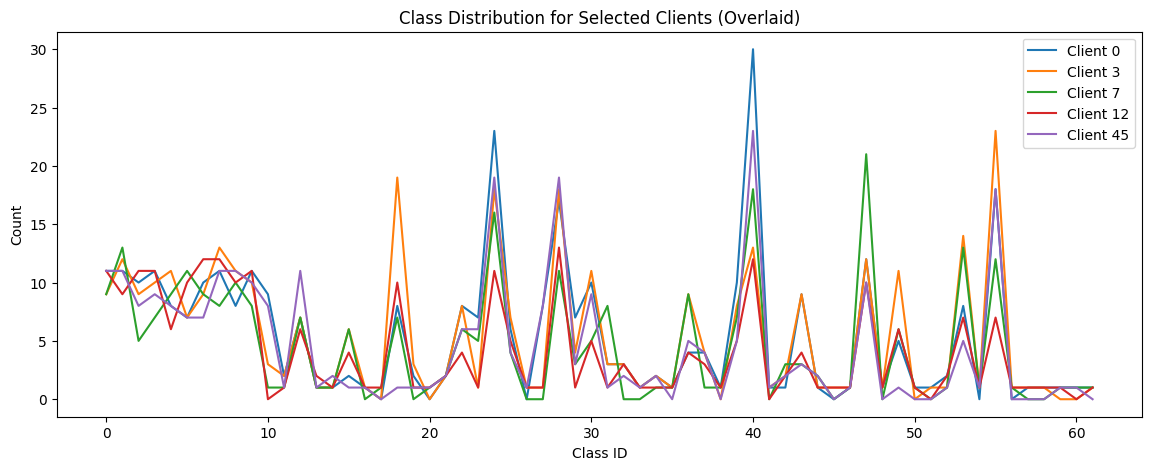

In [7]:
plt.figure(figsize=(14,5))

for uid, hist in client_hists.items():
    plt.plot(np.arange(62), hist, label=f"Client {uid}")

plt.xlabel("Class ID")
plt.ylabel("Count")
plt.title("Class Distribution for Selected Clients (Overlaid)")
plt.legend()
plt.show()

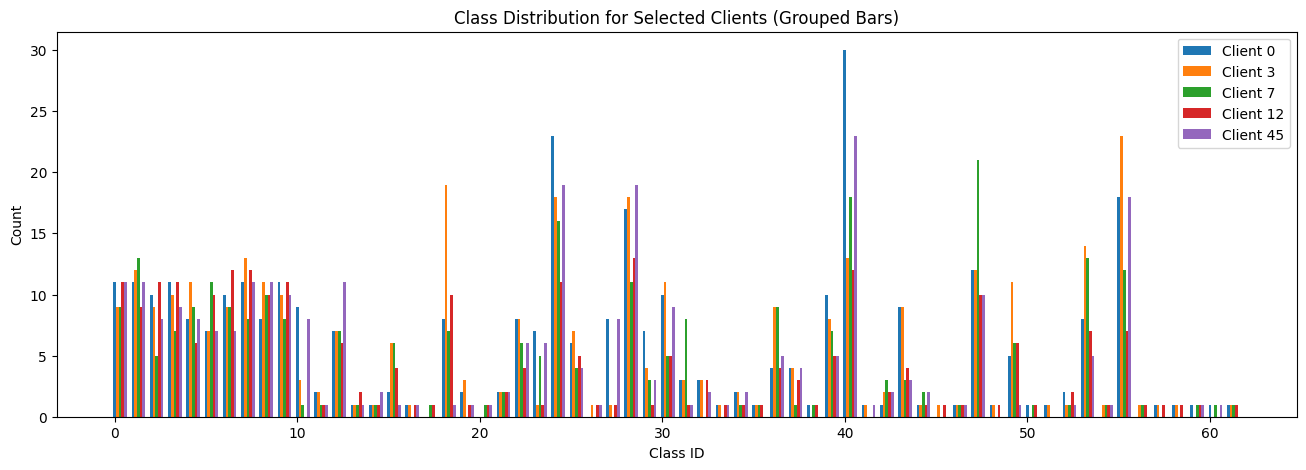

In [8]:
plt.figure(figsize=(16,5))
x = np.arange(62)
width = 0.15               # small width for grouping

client_ids = list(client_hists.keys())

for i, uid in enumerate(client_ids):
    plt.bar(x + i*width, client_hists[uid], width, label=f"Client {uid}")

plt.xlabel("Class ID")
plt.ylabel("Count")
plt.title("Class Distribution for Selected Clients (Grouped Bars)")
plt.legend()
plt.show()

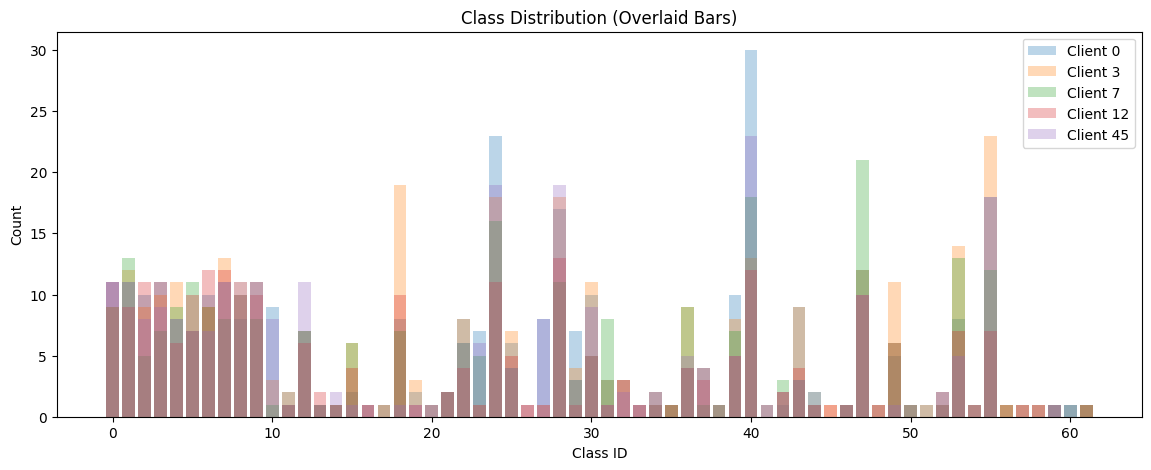

In [9]:
plt.figure(figsize=(14,5))

for uid, hist in client_hists.items():
    plt.bar(np.arange(62), hist, alpha=0.3, label=f"Client {uid}")

plt.xlabel("Class ID")
plt.ylabel("Count")
plt.title("Class Distribution (Overlaid Bars)")
plt.legend()
plt.show()